<div align="center">
  <a href="https://colab.research.google.com/github/biplab37/Graphene/blob/main/GN_model.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width='200'/>
  </a>
</div>

## Install and import Libraries

 This notebook is different from the other one as it uses the julia package[`PhaseGN`](https://github.com/biplab37/PhaseGN). Two cells below setup the necessary requirements(via `juliacall`). These can take slightly more than a minute to run.

In [6]:
%%bash
if [ -z `which julia` ]; then
    wget -nv https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
pip install juliacall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from juliacall import Main as jl
jl.seval('using Pkg; Pkg.add(url="https://github.com/biplab37/PhaseGN.git")')
jl.seval('using PhaseGN')

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Calculations

In [9]:
κ = 0.0
Λ = 100.0
μ = 0.0 
param = jl.Parameters(κ=κ, Λ=Λ)

In [10]:
def m(T):
    return jl.σ1(T,μ,param);

In [11]:
Trange = np.linspace(0.1,1.0,100)
sigma1 = np.vectorize(m)(Trange)

Text(0.8, 0.8, '$\\kappa =$0.0')

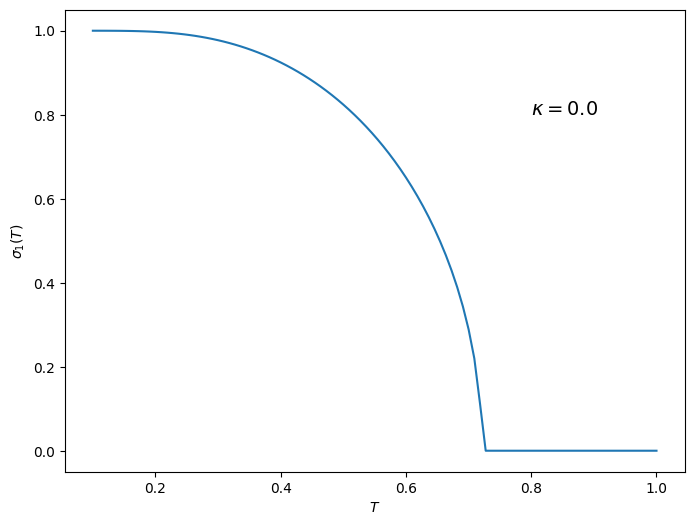

In [12]:
ax1 = plt.figure(figsize=(8,6)).add_subplot()
ax1.plot(Trange,sigma1)
ax1.set(xlabel=r'$T$',ylabel=r'$\sigma_1(T)$')
ax1.annotate(r'$\kappa =$'+str(κ),xy=(0.8,0.8),fontsize=14)


### Exciton Masses

In [13]:
param = jl.Parameters(κ=0.01, Λ=10.) ## Keep non zero values of kappa as the some of the underlying functions are ill defined at the chiral limit m=0.
def Msigma(T):
    return jl.M_sigma(T,μ,param)
def Mphi(T):
    return jl.M_phi(T,μ,param)

In [14]:
msigma = np.vectorize(Msigma)(Trange)
mphi = np.vectorize(Mphi)(Trange)
twicesigma1 = 2*np.vectorize(m)(Trange)

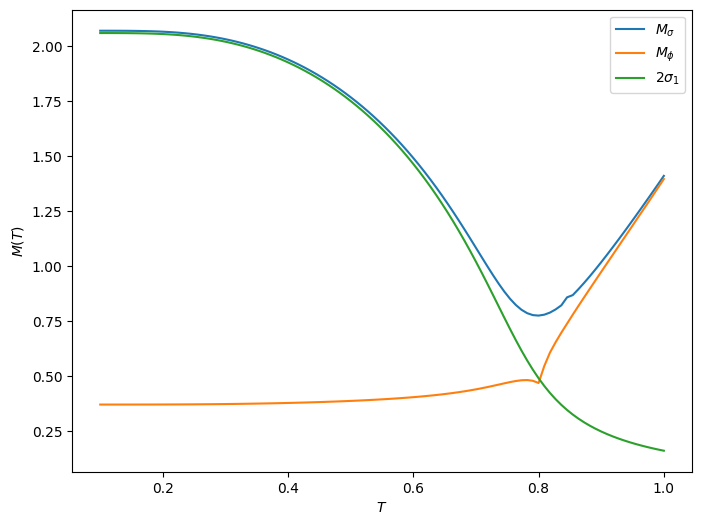

In [15]:
ax2 = plt.figure(figsize=(8,6)).add_subplot()
ax2.plot(Trange,msigma,label=r'$M_\sigma$')
ax2.plot(Trange,mphi,label=r'$M_\phi$')
ax2.plot(Trange,twicesigma1,label=r'$2\sigma_1$')
ax2.set(xlabel=r'$T$',ylabel=r'$M(T)$')
ax2.legend()

## Mean Field Approximation

In [ ]:
mu = 0.0
param = jl.Parameters(κ=0.01)
trange = np.linspace(0.05,2.5,100)
pressure_mean = [jl.pressure_MF(t,mu,param) for t in trange]


In [ ]:
# plot
plt.plot(trange,pressure_mean,xlabel='T',ylabel=r'$P/T^2$',title='Pressure at Mean Field')

## Phase

In [16]:
def plot_phase(phase,x_values):

    # Evaluate the function for each x value
    y_values = np.array([phase(x) for x in x_values])

    # Plot the function for each output separately
    plt.semilogx(x_values**2, y_values[:, 0], label='scattering')
    plt.semilogx(x_values**2, y_values[:, 1], label='resonant')
    plt.semilogx(x_values**2, y_values[:, 2], label='total')

    # Add a legend and labels to the plot
    plt.legend()
    plt.xlabel(r'$\omega^2$')
    plt.ylabel('Phase')

    # Show the plot
    plt.show()

For scalar channel

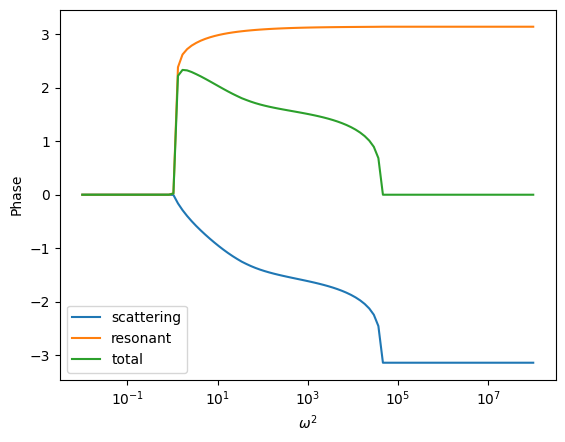

In [28]:
temp = 0.7
mu = 0.0
param = jl.Parameters(κ=0.01)
def phases_sigma(omega):
    return jl.phase_sigma(temp,mu,omega,param)

omegarange = np.logspace(-1,4,num=100)
plot_phase(phases_sigma,omegarange)


For Pseudo Scalar channel

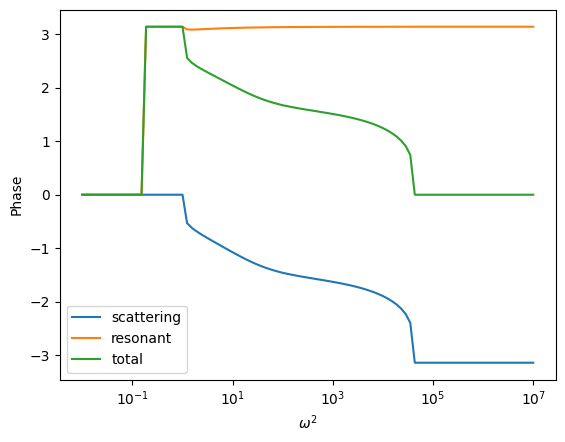

In [30]:
temp = 0.7
mu = 0.0
param = jl.Parameters(κ=0.01)
def phases_phi(omega):
    return jl.phase_phi(temp,mu,omega,param)

omegarange = np.logspace(-1,3.5,num=100)
plot_phase(phases_phi,omegarange)

## Pressure

### Scalar Channel

In [31]:
mu = 0.0
temprange = np.linspace(0.05,2.5,num=100)
pressure_sigma_sc = np.array([ jl.pressure(jl.phasesc_σ,temp,mu,param) for temp in temprange ] )
pressure_sigma_r = np.array([ jl.pressure(jl.phaser_σ,temp,mu,param) for temp in temprange ] )
pressure_sigma_tot = pressure_sigma_r + pressure_sigma_sc

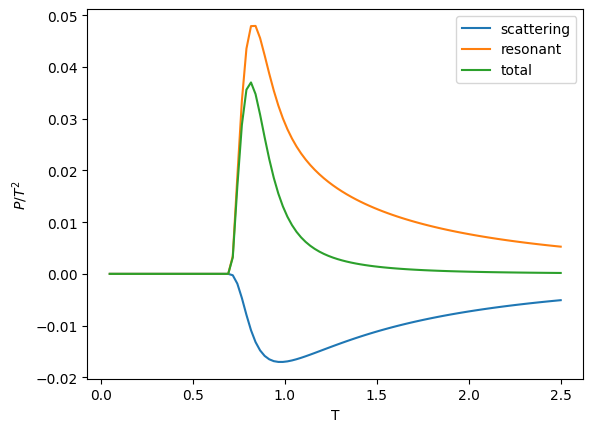

In [32]:
plt.plot(temprange,pressure_sigma_sc,label='scattering')
plt.plot(temprange,pressure_sigma_r,label='resonant')
plt.plot(temprange,pressure_sigma_tot,label='total')
plt.xlabel('T')
plt.ylabel(r'$P/T^2$')
plt.legend()


### Pseudo-Scalar Channel

In [33]:
mu = 0.0
temprange = np.linspace(0.05,2.5,num=100)
pressure_phi_sc = np.array([ jl.pressure(jl.phasesc_phi,temp,mu,param) for temp in temprange ] )
pressure_phi_r = np.array([ jl.pressure(jl.phaser_phi,temp,mu,param) for temp in temprange ] )
pressure_phi_tot = pressure_phi_r + pressure_phi_sc

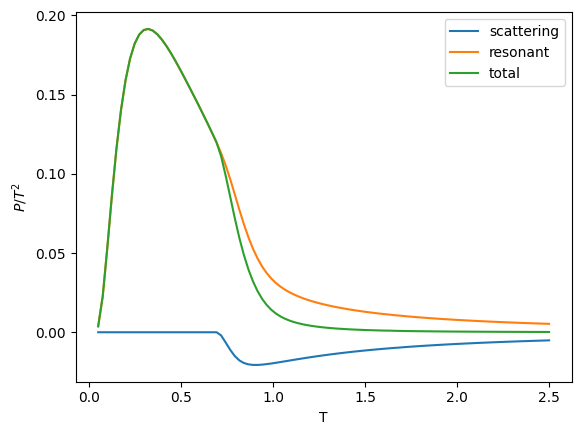

In [34]:
plt.plot(temprange,pressure_phi_sc,label='scattering')
plt.plot(temprange,pressure_phi_r,label='resonant')
plt.plot(temprange,pressure_phi_tot,label='total')
plt.xlabel('T')
plt.ylabel(r'$P/T^2$')
plt.legend()